In [67]:
%matplotlib inline
import os
import glob
import pandas as pd
import fiona
import rasterio
import rasterio.mask
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
years = [2015, 2016, 2017, 2018, 2019, 2020]

In [69]:
dataarchivedir = 'snowcoverarchive'
snowcoverdata = {}
for year in years:
    snowcoverdata[year] = pd.read_csv(os.path.join(dataarchivedir, f"snowcoverAK_{year}.zip"))

In [70]:
pd.concat(snowcoverdata.values())

,date,date.1,Kuskokwim Valley,Northern Panhandle,Central Panhandle,Southern Panhandle,Matanuska Valley and Anchorage,Kenai Peninsula,Tanana Valley-West,Susitna Valley,...,Middle Yukon,Upper Yukon Valley,Copper River Basin,Kodiak Island,North Slope,Tanana Zone-North,Seward Peninsula,Bristol Bay and AK Peninsula,Yukon-Kuskokwim Delta,Tanana Valley-East
0,2015-03-01,20150301,1.000000,0.000000,0.000000,0.000000,0.234492,0.632203,0.865315,0.882404,...,0.999910,0.999968,0.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.308515
1,2015-03-02,20150302,1.000000,0.000000,0.000000,0.000000,0.249167,0.632203,0.965264,0.992861,...,0.999910,0.999968,0.025196,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.348212
2,2015-03-03,20150303,1.000000,0.000000,0.000000,0.000000,0.249167,0.632203,0.965264,0.992861,...,0.999910,0.999968,0.025196,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.350532
3,2015-03-04,20150304,1.000000,0.000000,0.000000,0.000000,0.255910,0.632203,0.971060,0.993704,...,0.999910,0.980851,0.045927,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.281076
4,2015-03-05,20150305,1.000000,0.000000,0.000000,0.000000,0.255910,0.632203,0.992066,0.993704,...,0.999910,0.999968,0.057305,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.597783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2020-05-13,20200513,0.172779,0.709230,0.492722,0.302940,0.642789,0.361963,0.170659,0.654134,...,0.123508,0.295258,0.610883,0.0673,0.916241,0.644487,0.359217,0.207908,0.114838,0.144694
72,2020-05-14,20200514,0.172779,0.709230,0.492722,0.302940,0.642789,0.361963,0.170659,0.654134,...,0.123508,0.288228,0.610883,0.0673,0.874927,0.635843,0.359231,0.198514,0.114838,0.144694
73,2020-05-15,20200515,0.169316,0.709230,0.506002,0.304188,0.589878,0.364628,0.171371,0.636875,...,0.066845,0.269438,0.598597,0.0673,0.867198,0.642242,0.313566,0.184086,0.069550,0.144694
74,2020-05-16,20200516,0.158388,0.691295,0.506002,0.304188,0.561955,0.364052,0.171371,0.621009,...,0.046173,0.268301,0.582506,0.0673,0.867198,0.642242,0.156978,0.183920,0.069484,0.144694


In [64]:
pd.read_csv(os.path.join(dataarchivedir, "snowcoverAK_2020.zip"))

,date,date.1,Kuskokwim Valley,Northern Panhandle,Central Panhandle,Southern Panhandle,Matanuska Valley and Anchorage,Kenai Peninsula,Tanana Valley-West,Susitna Valley,...,Middle Yukon,Upper Yukon Valley,Copper River Basin,Kodiak Island,North Slope,Tanana Zone-North,Seward Peninsula,Bristol Bay and AK Peninsula,Yukon-Kuskokwim Delta,Tanana Valley-East
0,2020-03-01,20200301,1.000000,0.837905,0.678072,0.670925,0.999841,0.911517,1.000000,1.000000,...,1.000000,1.000000,0.976950,0.785115,1.000000,1.000000,1.000000,0.991471,0.999890,1.000000
1,2020-03-02,20200302,1.000000,0.837905,0.678072,0.670925,0.999841,0.911517,1.000000,1.000000,...,1.000000,1.000000,0.976950,0.785115,1.000000,1.000000,1.000000,0.991820,0.999890,1.000000
2,2020-03-03,20200303,1.000000,0.837905,0.678072,0.670925,0.999841,0.911517,1.000000,1.000000,...,1.000000,1.000000,0.976950,0.785115,1.000000,1.000000,1.000000,0.990970,0.999890,1.000000
3,2020-03-04,20200304,1.000000,0.837905,0.678072,0.670925,0.999841,0.911517,1.000000,1.000000,...,1.000000,1.000000,0.976950,0.785115,1.000000,1.000000,1.000000,0.990766,0.999890,1.000000
4,2020-03-05,20200305,1.000000,0.840219,0.678072,0.670925,1.000000,0.913462,1.000000,1.000000,...,1.000000,1.000000,0.976950,0.805859,1.000000,1.000000,1.000000,0.993131,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2020-05-13,20200513,0.172779,0.709230,0.492722,0.302940,0.642789,0.361963,0.170659,0.654134,...,0.123508,0.295258,0.610883,0.067300,0.916241,0.644487,0.359217,0.207908,0.114838,0.144694
72,2020-05-14,20200514,0.172779,0.709230,0.492722,0.302940,0.642789,0.361963,0.170659,0.654134,...,0.123508,0.288228,0.610883,0.067300,0.874927,0.635843,0.359231,0.198514,0.114838,0.144694
73,2020-05-15,20200515,0.169316,0.709230,0.506002,0.304188,0.589878,0.364628,0.171371,0.636875,...,0.066845,0.269438,0.598597,0.067300,0.867198,0.642242,0.313566,0.184086,0.069550,0.144694
74,2020-05-16,20200516,0.158388,0.691295,0.506002,0.304188,0.561955,0.364052,0.171371,0.621009,...,0.046173,0.268301,0.582506,0.067300,0.867198,0.642242,0.156978,0.183920,0.069484,0.144694


In [31]:
psa_file = "/Volumes/CWMobileSSD/Geodata_fires/AICC/AK_PSA_boundaries/predictive_service_areas.shp"
psa_shapes = {}
with fiona.open(psa_file, "r") as shapefile:
    for feature in shapefile:
        psa_shapes[feature['properties']['PSA_NAME']] = feature["geometry"]

In [32]:
psa_shapes.keys()

dict_keys(['Kuskokwim Valley', 'Northern Panhandle', 'Central Panhandle', 'Southern Panhandle', 'Matanuska Valley and Anchorage', 'Kenai Peninsula', 'Tanana Valley-West', 'Susitna Valley', 'Tanana Zone-South', 'Koyukuk and Upper Kobuk', 'Lower Yukon', 'Middle Yukon', 'Upper Yukon Valley', 'Copper River Basin', 'Kodiak Island', 'North Slope', 'Tanana Zone-North', 'Seward Peninsula', 'Bristol Bay and AK Peninsula', 'Yukon-Kuskokwim Delta', 'Tanana Valley-East'])

The first input is a list of GeoTIFF files in our directory, sorted alphabetically (ie, by date in ascending order).

In [33]:
tiffiledict = {}
snowcover_dir = "/Volumes/CWMobileSSD/Geodata_fires/2020_COVID_AFS/natice_noaa/"
geotiff_subdir = 'GeoTIFF_Products/'
geotiff_dir = os.path.join(snowcover_dir, geotiff_subdir)
for year in years:
    tiffiledict[year] = sorted(glob.glob(os.path.join(geotiff_dir, f"*{year}*.tif")))

### A quick-and-dirty time series for sample PSAs

As a sanity check / quality control, let's produce sample time series plots for these two PSAs. They look quite reasonable. 

In [15]:
labels = []
tanana_west = []
kenai = []
for tiffile in tiffiles:
    labels.append(tiffile[90:98])
    with rasterio.open(tiffile) as src:
        kenai_img, _ = rasterio.mask.mask(src, [psa_shapes['Kenai Peninsula']], crop=True)
        tanana_west_img, _ = rasterio.mask.mask(src, [psa_shapes['Tanana Valley-West']], crop=True)
    unique_kenai, counts_kenai = np.unique(kenai_img[0], return_counts=True)
    counts = np.zeros(5)
    counts[unique_kenai] = counts_kenai
    kenai.append(sum(counts[3:]) / sum(counts[1:]))
    unique_tanana_west, counts_tanana_west = np.unique(tanana_west_img[0], return_counts=True)
    counts = np.zeros(5)
    counts[unique_tanana_west] = counts_tanana_west
    tanana_west.append(sum(counts[3:]) / sum(counts[1:]))

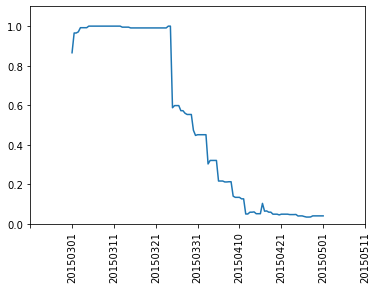

In [16]:
plt.plot(tanana_west)
locs, _ = plt.xticks()
_ = plt.xticks(locs, [''] + labels[::10], rotation=90)
_ = plt.ylim((0,1.1))

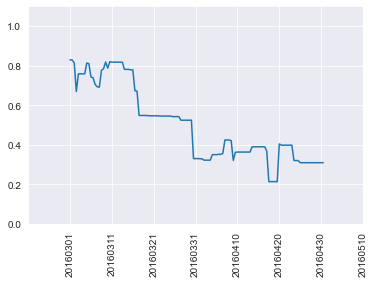

In [224]:
plt.plot(kenai)
locs, _ = plt.xticks()
_ = plt.xticks(locs, [''] + labels[::10], rotation=90)
_ = plt.ylim((0,1.1))

### Let's generate, save and visualize a complete dataset

We will first put the data in a large dictionary, then generate a Pandas Dataframe from the dictionary. 

In [34]:
snowdatadict = {}

for year in tiffiledict:
    datadict = {}
    tiffiles = tiffiledict[year]
    for tiffile in tiffiles:
        try: 
            datadict['date'].append(tiffile[90:98])
        except KeyError:
            datadict['date'] = [tiffile[90:98]]
        with rasterio.open(tiffile) as src:
            psa_img, _ = rasterio.mask.mask(src, [psa_shapes['Tanana Valley-West']], crop=True)
            unique_psa, counts_psa = np.unique(psa_img[0], return_counts=True)
            counts = np.zeros(5)
            counts[unique_psa] = counts_psa
            try: 
                datadict['Tanana Valley-West'].append(sum(counts[3:]) / sum(counts[1:]))
            except KeyError:
                datadict['Tanana Valley-West'] = [sum(counts[3:]) / sum(counts[1:])] 
    snowdatadict[year] = pd.DataFrame.from_dict(datadict)

In [35]:
list(tiffiledict.keys())

[2015, 2016, 2017, 2018, 2019, 2020]

In [38]:
for year in snowdatadict.keys():
    (snowdatadict[year]).reset_index(drop=True, inplace=True)


In [72]:
sns.set_style("darkgrid")

Text(0.5, 1.0, 'Tanana Valley-West Snowcover')

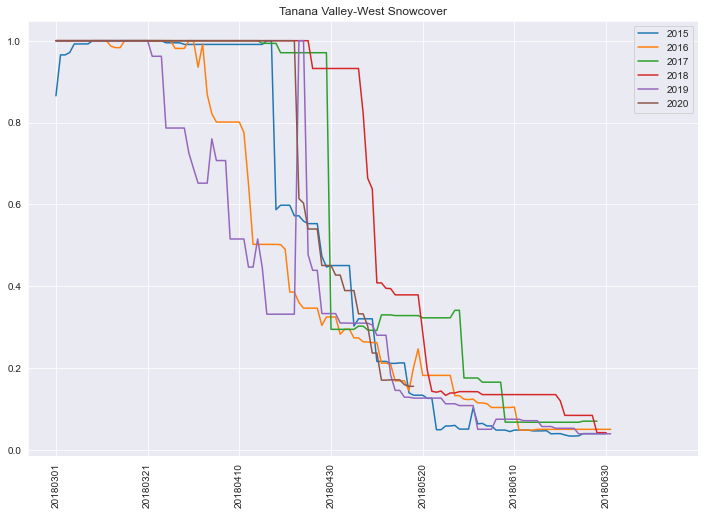

In [73]:
fig, ax = plt.subplots(figsize=(12, 8))
for year in tiffiledict.keys():
    snowdatadict[year].plot(ax=ax)
ax.legend(years)
locs, _ = plt.xticks()
_ = plt.xticks(locs[1:], list(snowdatadict[2018].date)[::20], rotation=90)
plt.title("Tanana Valley-West Snowcover")

In [75]:
fig.savefig("TananaValleyWest_allyears.png")

In [49]:
snowdatadict[2018].head()

,date,Tanana Valley-West
0,20180301,1.0
1,20180302,1.0
2,20180303,1.0
3,20180304,1.0
4,20180305,1.0
